In [1]:
from init import *
from helpers_analyses import *


Getting english data
Getting french data
Getting emotion words and bird names
number of overlapping words between Leuven and Rosch: 25
correlation between Leuven and Rosch ratings: (0.9519771567894879, 2.5885716906113406e-13)


seeds: ['love', 'anger', 'hate', 'fear', 'depression']
seeds: ['joie', 'émotion', 'amour', 'peur', 'passion']
seeds: ['love', 'anger', 'hate', 'fear', 'depression']
English, Pearson correlation between empirical prototypicality and reconstructed: r = 0.621624, p-value = 0.000000, n = 129
seeds: ['joie', 'émotion', 'amour', 'peur', 'passion']
French, Pearson correlation between empirical prototypicality and reconstructed: r = 0.598058, p-value = 0.000000, n = 121


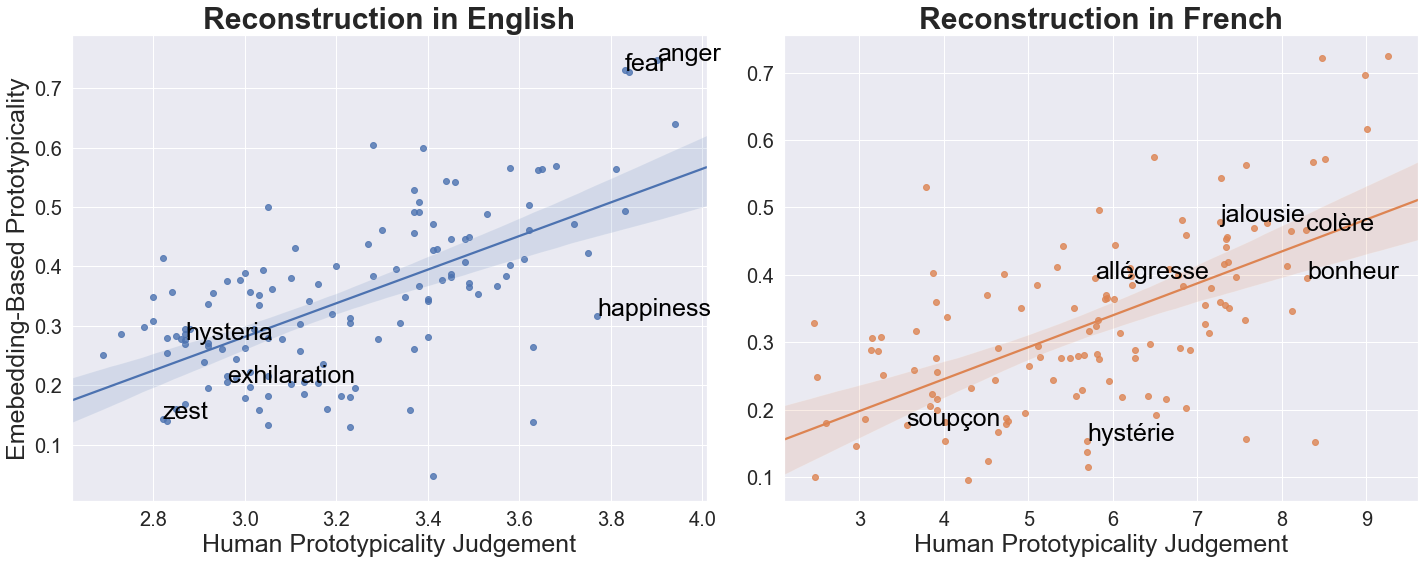

In [3]:
# plot reconstruction
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

def plot_reconstruction(ax, p, e):
    df = pd.DataFrame({
        'prototypicality': p, 
        'similarity': e, 
    }) 
    ax = sns.regplot(ax=ax, x="prototypicality", y="similarity", data=df)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20) 
    ax.set_xlabel('Human Prototypicality Judgement', fontsize=25)
    ax.set_ylabel('Emebedding-Based Prototypicality', fontsize=25)
    return ax

def annotate_scatter(ax, words, example_words, seeds, proto, vectors, t, seed_num):
    words = [w for w in words if vectors_filter(w, t, vectors)]
    seeds = [w for w in seeds if w in words][0:seed_num]
    print('seeds:', seeds)
    
    prototype = np.mean([vectors[w][t] for w in seeds], axis=0)
    for w in example_words:
        x = proto[w]
        y = similarity(vectors[w][t], prototype)
        ax.annotate(w, xy=(x,y), xytext=(x,y), color='black', fontsize=25)
    return ax

eng_examples = [
    'hysteria', 'zest', 'exhilaration',
    'happiness', 'anger', 'fear',
]
fra_examples = [
    'hystérie', 'allégresse', 'soupçon',
    'bonheur', 'colère', 'jalousie'
]

t_plot = -1

# emotion words
fig, axes = plt.subplots(1, 2, sharex=False, sharey=False, figsize=(20, 8))
axes[0].set_title('Reconstruction in English', fontsize=30, weight='bold')
axes[1].set_title('Reconstruction in French', fontsize=30, weight='bold')

axes[0] = annotate_scatter(axes[0], words_eng, eng_examples, eng_seeds, proto, data, t_plot, 5)
axes[1] = annotate_scatter(axes[1], words_fr, fra_examples, fra_seeds, proto_fr, data_fr, t_plot, 5)

s = 'Pearson correlation between empirical prototypicality and reconstructed: r = %f, p-value = %f, n = %d'

p, e = estimate_proto(eng_seeds, words_eng, data, proto, t=t_plot, seed_num=5)
r, pval = pearsonr(p, e)
print('English, ' + s % (r, pval, len(p)))
plot_reconstruction(axes[0], p, e)

p, e = estimate_proto(fra_seeds, words_fr, data_fr, proto_fr, t=t_plot, seed_num=5)
r, pval = pearsonr(p, e)
print('French, ' + s % (r, pval, len(p)))
plot_reconstruction(axes[1], p, e)

axes[1].set_ylabel('')
plt.tight_layout()
img_format = 'svg'
plt.savefig('images/figure2.'+img_format, format=img_format, bbox_inches='tight')

